# Examining the correlation between expression of Basal/Classical axis and the expression of day 7 validation cNMF modules in TGCA PAAD samples 

CK, October 26 2022

### What this does
 - Loads in TCGA metadata from 1_preprocessing_TCGA_data.ipynb
 - Plots the correlations between cNMF modules and Basal/classical scores


In [4]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statsmodels.stats.multitest import multipletests

from scipy.stats import pearsonr, spearmanr

# File paths for loading basal/classical signatures
data_path = '../1_Data/'

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica"

results_file = "raghavan_data/raghavan_malignant_cells.h5ad"

#### Loading in TGCA from R notebook

In [5]:
tgca = pd.read_csv("../../../CK/tgca_paad_analysis/tgca_paad_meta_data.csv",index_col=0)

In [7]:
cnmf_signatures = ['low.complexity.3_1', 'cell.cycle.G2M_1',
       'low.complexity.1_1', 'type.I.IFN_1', 'NFKB_1', 'ribosomal_1',
       'wound.healing_1', 'mitochondrial_1', 'cell.cycle.S.phase_1',
       'IFNgamma_1', 'classical_1', 'low.complexity.2_1', 'TGFbeta_1']
pdac_sigs = [ 'mClassical1', 'mBasal1',
       'scClassical1', 'scBasal1', 'scOrganoidSpecific1', 'scIT1',
       'EMT_up1', 'mBC', 'scBC']
database_signatures = ['hallmark_tgfb1', 'hallmark_ifna1', 'hallmark_ifng1',
       'hallmark_emt1', 'hallmark_tnfa1', 'biocarta_il41', 'liu_il41','reactome_il41']

modules = cnmf_signatures

### Correlating pdac signatures with cnmf & msigb signatures

In [8]:
corr_of_mean_sig_and_mean_module_by_patient = np.zeros((len(pdac_sigs),len(modules)))
pvals_of_mean_sig_and_mean_module_by_patient = np.zeros((len(pdac_sigs),len(modules)))
for i in range(len(pdac_sigs)):
    for j in range(len(modules)):
        corr_of_mean_sig_and_mean_module_by_patient[i,j] = pearsonr(tgca[pdac_sigs[i]],tgca[modules[j]])[0]
        pvals_of_mean_sig_and_mean_module_by_patient[i,j] = pearsonr(tgca[pdac_sigs[i]],tgca[modules[j]])[1]
corr_of_mean_sig_and_mean_module_by_patient = pd.DataFrame(corr_of_mean_sig_and_mean_module_by_patient,
                                                           index=pdac_sigs, 
                                                           columns = modules)
pvals_of_mean_sig_and_mean_module_by_patient = pd.DataFrame(pvals_of_mean_sig_and_mean_module_by_patient,
                                                           index=pdac_sigs, 
                                                           columns = modules)

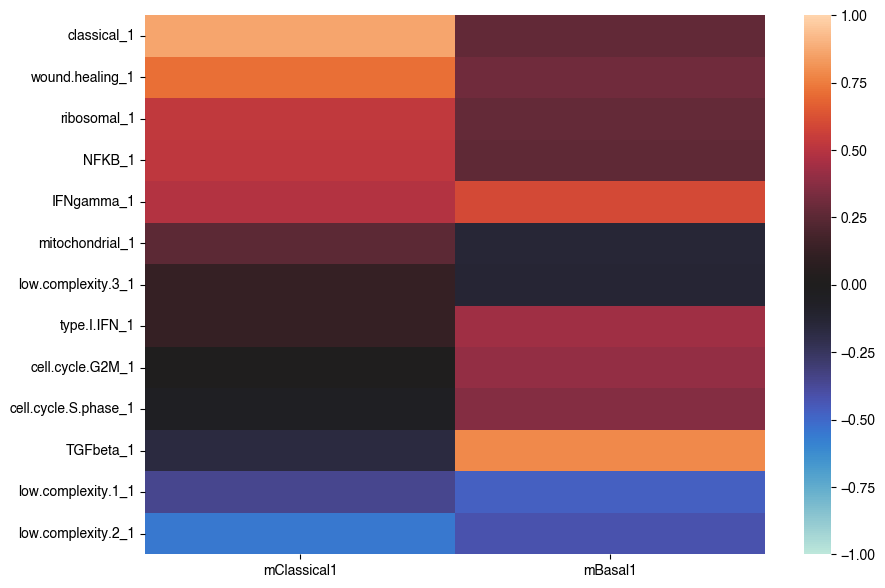

In [36]:
plt.rcParams['figure.figsize'] = [10, 7]
correlations = pd.DataFrame(corr_of_mean_sig_and_mean_module_by_patient.loc[['mClassical1','mBasal1']])
correlations = correlations.T.sort_values(by='mClassical1',ascending=False)
sns.heatmap(correlations,vmax=1,vmin=-1,cmap='icefire')
plt.savefig("tgca_singature_correlations.pdf")